#  IPL Data Analysis (2008–2020)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Styling for charts
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


## Load and Explore the Datasets

In [21]:
# Load CSVs
matches = pd.read_csv(r"C:\Users\SURAJ\Downloads\matches.csv")
deliveries = pd.read_csv(r"C:\Users\SURAJ\Downloads\deliveries.csv")

# Basic overview
print("Matches Shape:", matches.shape)
print("Deliveries Shape:", deliveries.shape)

matches.head()


Matches Shape: (1095, 20)
Deliveries Shape: (260920, 17)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


## Understand Data Structure & Clean Missing Values

In [22]:
# Structure
matches.info()
print("")
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [23]:
# Null value check
print("Matches Missing Values:\n", matches.isnull().sum())
print("\nDeliveries Missing Values:\n", deliveries.isnull().sum())


Matches Missing Values:
 id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Deliveries Missing Values:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             2

# We'll drop columns with excessive missing data or non-essential for analysis.

In [24]:
# Drop umpire3 (always null), replace missing winner with 'Draw'
# matches.drop(columns=['umpire3'], inplace=True)
matches['winner'].fillna("Draw", inplace=True)
matches.dropna(inplace=True)
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

##  Basic Statistics & Match Insights

In [25]:
print("Total Matches Played:", matches.shape[0])
print("Total Seasons:", matches['season'].nunique())
print("Most Cities Played In:", matches['city'].nunique())
print("Most Teams Played:", matches['team1'].nunique())


Total Matches Played: 21
Total Seasons: 9
Most Cities Played In: 12
Most Teams Played: 11


## Most Successful Teams by Wins

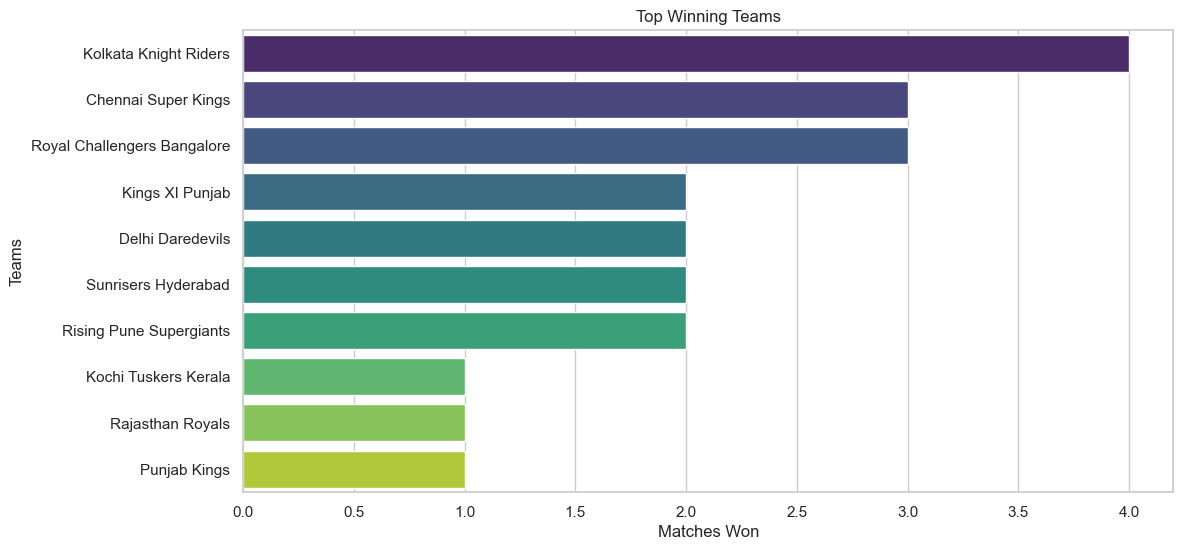

In [26]:
top_teams = matches['winner'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title("Top Winning Teams")
plt.xlabel("Matches Won")
plt.ylabel("Teams")
plt.show()


## Does Toss Affect Winning?

In [27]:
toss_effect = matches[matches['toss_winner'] == matches['winner']]
print(f"Matches where Toss Winner also won the match: {len(toss_effect)}")
print(f"Percentage: {round((len(toss_effect)/matches.shape[0])*100, 2)}%")


Matches where Toss Winner also won the match: 11
Percentage: 52.38%


## Top 'Player of the Match' Award Winners

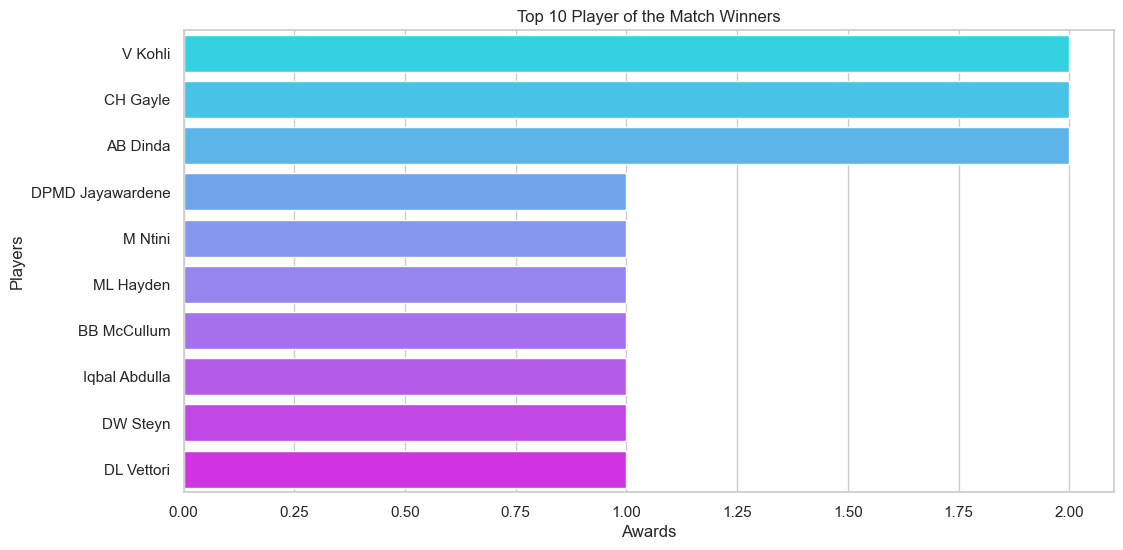

In [28]:
pom = matches['player_of_match'].value_counts().head(10)
sns.barplot(x=pom.values, y=pom.index, palette='cool')
plt.title("Top 10 Player of the Match Winners")
plt.xlabel("Awards")
plt.ylabel("Players")
plt.show()


##  Batsman Performance Analysis

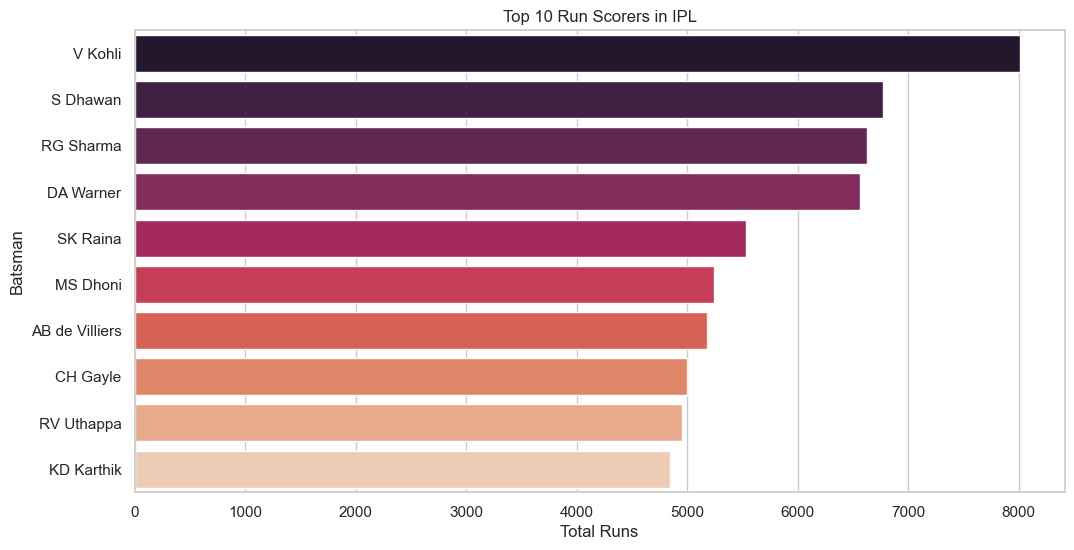

In [29]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='rocket')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()


##  Bowler Performance Analysis

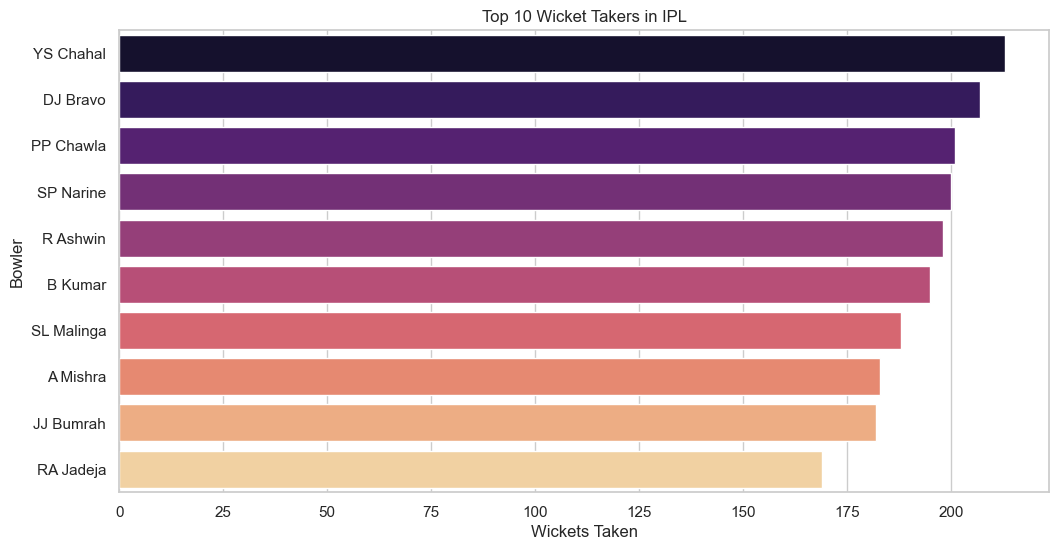

In [30]:
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = top_bowlers.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma')
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.show()


## Year-wise Champion Teams

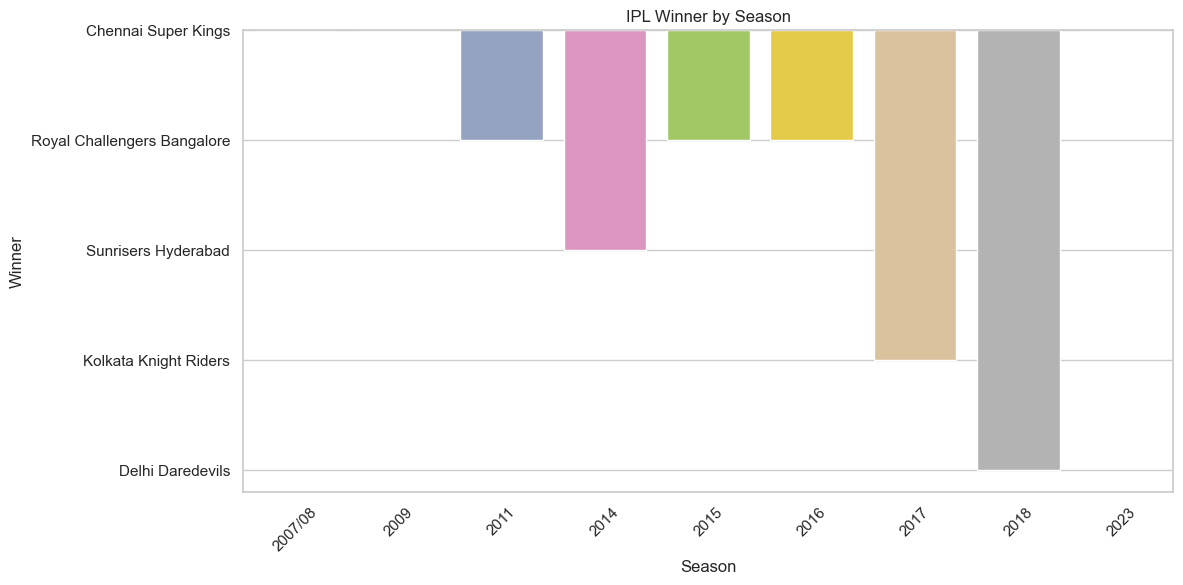

In [31]:
season_winners = matches.drop_duplicates('season', keep='last')[['season', 'winner']]
sns.barplot(data=season_winners, x='season', y='winner', palette='Set2')
plt.title("IPL Winner by Season")
plt.xticks(rotation=45)
plt.ylabel("Winner")
plt.xlabel("Season")
plt.show()


##  Venue and State Analysis

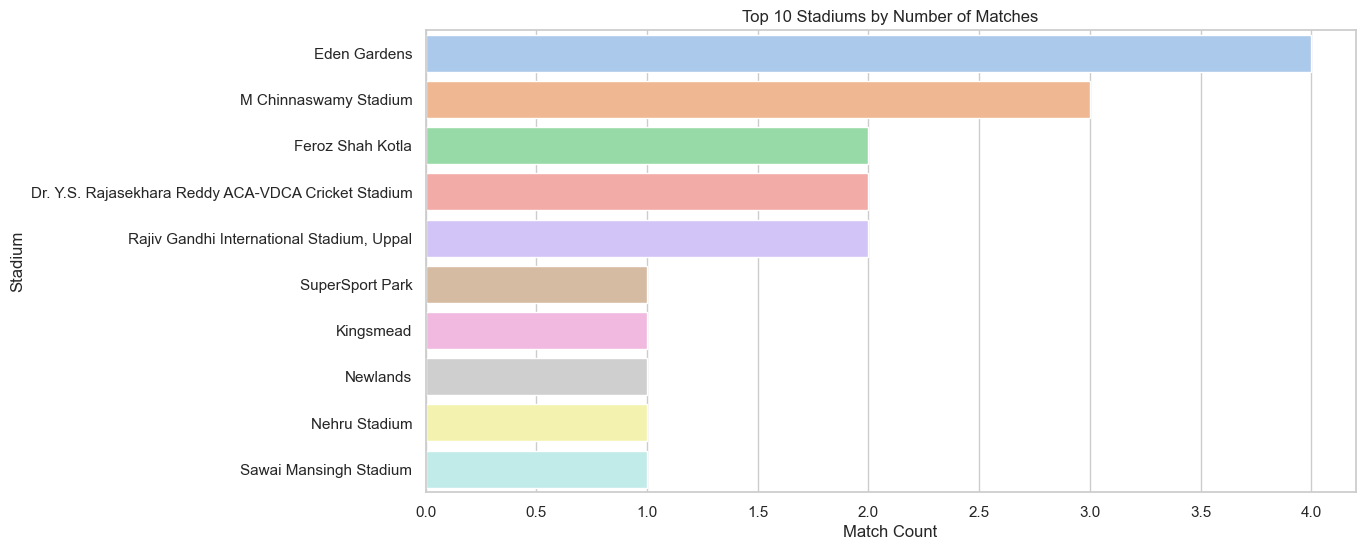

In [32]:
top_venues = matches['venue'].value_counts().head(10)
sns.barplot(x=top_venues.values, y=top_venues.index, palette='pastel')
plt.title("Top 10 Stadiums by Number of Matches")
plt.xlabel("Match Count")
plt.ylabel("Stadium")
plt.show()
